In [108]:
import pandas as pd;
import matplotlib.pyplot as plt
import numpy as np

In [109]:
def generateData(filename):
	data = pd.read_csv(filename);
	dataDict = {};

	for row in data.iterrows():
		countryName = row[1][0];
		year = row[1][2];
		countryGDP = row[1][3];

		if year == 2014:
			dataDict[countryName] = countryGDP;

	return dataDict;

In [110]:
def stitch(dictA, dictB):
	namesA = set(dictA);
	namesB = set(dictB);
	names = namesA.intersection(namesB);
	points = [];

	for name in names:
		point = (dictA[name], dictB[name]);
		points.append(point);

	return points;

In [111]:
def plot(filenameX, xlabel, filenameY, ylabel):
	xDict = generateData(filenameX);
	yDict = generateData(filenameY);

	r = stitch(xDict, yDict);

	xList = list(map(lambda ar: ar[0], r));
	yList = list(map(lambda ar: ar[1], r));

	plt.plot(xList, yList, 'o', color='black');
	plt.xlabel(xlabel);
	plt.ylabel(ylabel);
	plt.show();

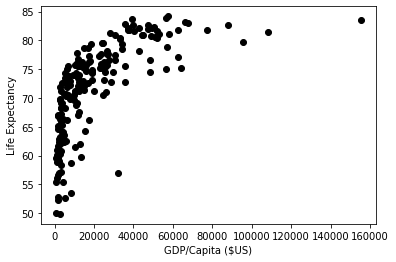

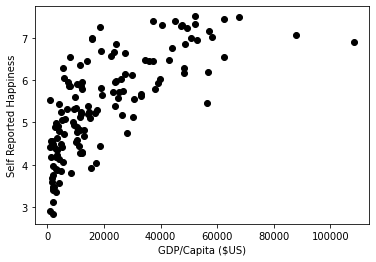

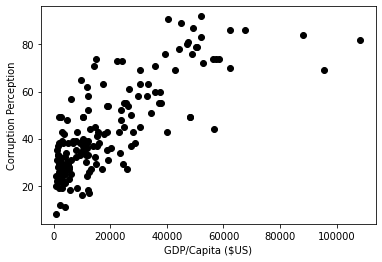

In [112]:
plot("./gdp.csv", "GDP/Capita ($US)", "./le.csv", "Life Expectancy");

plot("./gdp.csv", "GDP/Capita ($US)", "./happy.csv", "Self Reported Happiness");

plot("./gdp.csv", "GDP/Capita ($US)", "./corrupt.csv", "Corruption Perception");

In [117]:
def getMeanStandard():
    import statistics
    y = generateData('le.csv')
    yList = []
    for key, value in y.items():
        yList.append(value)
    
    mean = statistics.mean(yList)
    standard = statistics.stdev(yList)
    return mean, standard

m, s = getMeanStandard()
print('Mean: ', m)
print('Standard: ', s)


Mean:  72.65748285539095
Standard:  7.893805963248772


In [115]:
def filter_dict(): 
    LeDict = {}
    newDict = dict()
    LeDict = generateData('le.csv')

    meanVal, standardVal = getMeanStandard()
    meanstandard = meanVal + standardVal

    for (key, value) in LeDict.items():
        if value >= meanstandard:
            newDict[key] = value
    return newDict

In [116]:
def sort_dict():
    newDict = filter_dict()
    import operator
    sorted_list = sorted(newDict.items(), key=operator.itemgetter(1))
    print(sorted_list)

print(sort_dict())

[('Germany', 80.642), ('Isle of Man', 80.67399999999999), ('Falkland Islands', 80.73100000000001), ('Belgium', 80.797), ('Saint Martin (French part)', 80.817), ('Tokelau', 80.84), ('Saint Barthlemy', 80.863), ('Guadeloupe', 80.968), ('United Kingdom', 80.97800000000001), ('Portugal', 80.995), ('Finland', 81.002), ('Ireland', 81.07600000000001), ('Austria', 81.10300000000001), ('Anguilla', 81.243), ('Greece', 81.361), ('Luxembourg', 81.442), ('Martinique', 81.539), ('Netherlands', 81.559), ('New Zealand', 81.561), ('Malta', 81.71600000000001), ('Norway', 81.792), ('South Korea', 81.795), ('Bermuda', 81.828), ('Canada', 81.927), ('Liechtenstein', 81.973), ('France', 82.11399999999999), ('Sweden', 82.118), ('Israel', 82.175), ('Channel Islands', 82.25200000000001), ('Iceland', 82.359), ('Australia', 82.62700000000001), ('Italy', 82.648), ('Singapore', 82.667), ('Spain', 82.801), ('Andorra', 82.82799999999999), ('Switzerland', 82.971), ('Cayman Islands', 83.171), ('Macao', 83.5429999999999

In [135]:
dictNew1 = generateData('le.csv')
dictNew2 = generateData('gdp.csv')

r = stitch(dictNew1, dictNew2)

xList = list(map(lambda ar: ar[1], r));
yList = list(map(lambda ar: ar[1], r));

mean, standard = getMeanStandard()
print(r)

for i in range(len(r)):
    if r[1][i] >= 15000 and r[2] >= mean:
        pass

[(70.48100000000001, 6973.6389092765), (78.922, 57213.26784056231), (72.523, 3545.20737254596), (62.582, 5556.704810443221), (82.62700000000001, 47289.9646101072), (70.42699999999999, 5861.464132687), (82.971, 67682.6861750714), (72.175, 7990.459573856179), (74.491, 25387.0076467731), (52.788999999999994, 1866.2660786177398), (80.47399999999999, 33098.944161992404), (82.667, 87959.4167487017), (73.969, 10284.6700959691), (82.11399999999999, 43021.3946358903), (74.556, 29855.831491032597), (66.995, 1992.23381494478), (80.178, 33207.7707129666), (62.416000000000004, 4670.24489811829), (75.44, 14288.822306515), (80.642, 50770.613487823604), (61.723, 1621.34466455089), (75.747, 15854.1318583817), (81.07600000000001, 58267.412265808205), (63.181000000000004, 3909.33865961052), (81.002, 44976.7764487708), (71.133, 20210.9961829311), (60.669, 2022.2948200763199), (74.273, 11019.838784895), (72.768, 28796.559068823997), (83.171, 66326.88748009781), (73.192, 19066.8868190919), (78.072, 26826.59

TypeError: '>=' not supported between instances of 'tuple' and 'float'